# The Accumulation Function

### Charlie Bailey (peba2926)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ebola Graphing

#### 1)

![Sketch of accumulation function for Ebola data](./assets/ebola_1.jpeg)

#### 2) 0 deaths at t=0

**Total Deaths:** 215

**Peak of illness:** Between days 39 and 43

**Reasoning:** This is the point on the graph with the steepest slope indicating the highest rate of change in total deaths—and therefore the "peak" of the illness.

**Concept comparison:** the shape on the original graph that represents the peak is height of the histogram bars. From days 39 through 43 we see sequentially taller histograms. In the graph of total deaths over time, this same concept is represented by the increased slope of the graph over this period.

**Derivative of accumulation function:** The derivative of the accumulation function is the rate of change in the total number of deaths at a given time.

#### 3) 25 deaths at t=0

![Sketch of accumulation function t(0)=25](./assets/ebola_2.jpeg)


**Total deaths:** 240

**Deaths at time zero:** 25

**Using this information:** To use this information, all we need to do is shift our accumulation function up by 25 on the y-axis. The function itself remains the same—we are simply adding 25 to each per day accumulated total. This tells us that the actual total on day 89 will just be the previous total of 215 plus 25 equal to 240.

#### 4) Smooth curve

![Sketch of accumulation function for Ebola data](./assets/ebola_3.jpeg)


**Peak of deaths:** At the top of the tallest histogram bar (day 41)

**Smooth curve accumulation function graph:** The accumulation function of the smooth curve will essentially follow the histogram based accumulation function to start; but around day 33, it will start to grow faster than the histogram function since it is above the histogram for a large period of time—thus accumulating more deaths than the actual histogram. This discrepancy is not equalized by the smooth curve being under the histogram, so the smooth curve accumulation function will over accumulate deaths.

**Average number of deaths per day:** 4.32

**Finding the average number of deaths per day:** To find the average number of deaths per day under our curve, all we need to do is add up the total number of deaths our accumulation function generates and divide by the number of days. However, given that this is a smooth curve, that is difficult to by hand. What I opted to do was draw approximate ranges (boxes) where everything within that range would be counted at a certain death amount (e.g., in the graph above days 1-13 I'm accumulating 1 death per day for each day—which approximates what the accumulation function of the smooth curve would total). Once I had these ranges, I simply plugged them into Excel and summed (see dataframe below). We see that this methods gives us 363 total deaths over 84 days which is on average 4.32 deaths per day. This total is significantly higher than the actual total of the histogram, but in line with our earlier hypothesis about the accumulation function total given how I drew the smooth curve.

In [3]:
df = pd.read_csv('./assets/deaths_per_day.csv')
display(df)

total_deaths = df['deaths'].sum()
print(f'Total Deaths: {total_deaths}')

num_days = df.shape[0]
avg_deaths_per_day = total_deaths / num_days
print(f'Average number of deaths per day: {round(avg_deaths_per_day,2)}')

,day,deaths
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
79,80,3
80,81,3
81,82,3
82,83,3


Total Deaths: 363
Average number of deaths per day: 4.32


#### 7) Considering other smooth curves

##### Good or bad about each
**A:** Captures bulk of the latter half of the data, but will under count first half.

**B:** Appropriately centered on peak, but will over count.

**C:** Skewed right of peak, but will be more accurate count overall.

**D:** Well fit to centroid of data so will be more accurate but may under count.

**E:** Again, well fit to centroid of data; potentially most accurate smoothing from an accumulation perspective. 

**F:** Very similar to D; likely will under count data more than D.



**Represent same number of total deaths:** No, each of these curves will have a different number of total deaths since their areas under the curve are all different.

**Best fit:** To my eye, D appears to be the best fit. It is well fit to the centroid of the data, capturing the balance between over and under counting.

#### 8) Match smooth curves to accumulation functions

1 = E

2 = D

3 = A

4 = B

5 = C

6 = F

## Code TABLE

In [4]:
def TABLE(t_initial, t_final, func, num_steps=100, accum_start=0):
    # initialize all values
    t = t_initial
    # set the granularity (size of time slices) to analyze at 
    delta_t = (t_final - t_initial) / num_steps
    accum = accum_start
    # aggregate data for plotting the table using a dataframe
    # this first row sets the column names of the table
    table_data = [('Current delta_y', 'Accumulated delta_y', 'Ending t')]

    # iterate though the function accumulating at each step
    for _ in range(0, num_steps):
        # calculate the change in y for this time slice
        delta_y = func(t) * delta_t
        # add it to the accumulator
        accum += delta_y
        # increment the time
        t += delta_t
        # store data for printing the table or plotting
        table_data.append((delta_y, accum, t))
    
    # convert table data to dataframe (more modern way to view our table!)
    # set the first row as the columns
    table = pd.DataFrame(table_data[1:], columns=table_data[0])
    display(table)

    # still return our table data for additional analysis
    return table_data

# generate plot and get table data
table_data = TABLE(0, 4, lambda t: np.cos(t**2), 8)

,Current delta_y,Accumulated delta_y,Ending t
0,0.500000,0.500000,0.5
1,0.484456,0.984456,1.0
2,0.270151,1.254607,1.5
3,-0.314087,0.940521,2.0
4,-0.326822,0.613699,2.5
5,0.499725,1.113423,3.0
6,-0.455565,0.657858,3.5
7,0.475185,1.133044,4.0


**TABLE Explained**

As we can see in the code above, this TABLE function takes in a start time, end time, number of steps (which can be thought of as the granularity at which we will evaluate our function), a function to evaluate, and initial accumulator value.

The function starts off by initializing our time counter (`t`) to be the initial time. It then determines how granular we want our analysis to be by taking our total time range and dividing that into the number of steps we want.

We then initialize our accumulator variable to the initialization value passed in and create a table data store that will use to plot our table after accumulating.

Next, we iterate through each time slice (step), calling our desired function at the current `t` value to get the exact value of our func at `t`. We then multiply this by our `delta_t` variable, which essentially says that for this next very small slice of time, we can approximate that this is how much `y` will change. With smaller and smaller `delta_t` values, this approximation become more and more accurate.

*(Note: I just had an ah-ha moment and realize that this is exactly what I did to calculate the total number of deaths under the hand drawn curve above without even realizing it! Very cool.)*

Next, we increment our time and accumulation variables and store our table data.

Finally, once we have iterated through all of our time slices, we convert our table data into a dataframe to view it. We still return this table data in case we want to do some additional analysis on it.

We can see in the following demo that this results in the exact data generated in our book for $cos(t^2)$.

## PLOT function

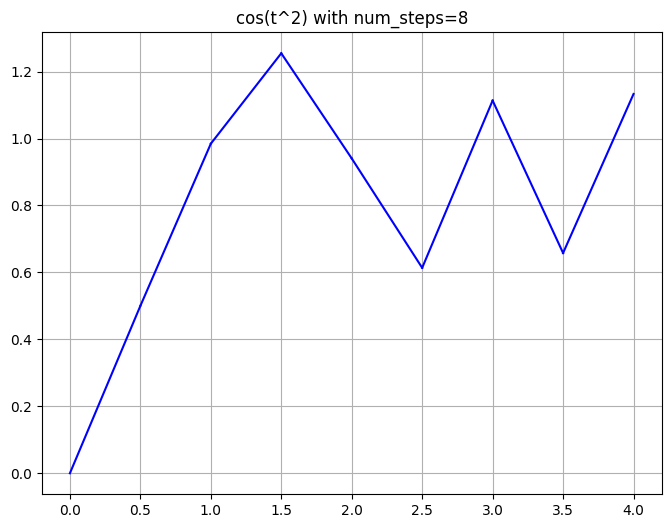

In [5]:
def PLOT(t_initial, t_final, func, func_name, num_steps=100, accum_start=0, ax=None):
    # initialize all values
    t = t_initial
    # set the granularity (size of time slices) to analyze at 
    delta_t = (t_final - t_initial) / num_steps
    accum = accum_start

    # if no axis is passed in for multi-plotting initialize new plot
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # iterate though the function accumulating at each step
    for _ in range(0, num_steps):
        # calculate the change in y for this time slice
        delta_y = func(t) * delta_t

        # plot the new new segment
        # x1, x2 and y1, y2
        ax.plot([t, (t+delta_t)], [accum, (accum+delta_y)], color='blue')
    
        # add it to the accumulator
        accum += delta_y
        # increment the time
        t += delta_t

    if ax is None:
        # add title and show plot
        plt.title(f'{func_name} with num_steps={num_steps}')
        plt.grid(True)
        plt.show()
    else:
        # add title and grid line to ax
        ax.set_title(f'{func_name} with num_steps={num_steps}')
        ax.grid(True)


# generate plot
PLOT(0, 4, lambda t: np.cos(t**2), func_name=r'cos(t^2)', num_steps=8)

**PLOT Explained**

As we can see, the PLOT function is very similar to the TABLE function, with the only exeception that instead of storing the data, we instead plot a segment from the previous `t` and `accum` point, to the point calculated in the next incremental step. As we can see, with the same number of steps as our TABLE function, the `delta_t` here is far too large to truly capture a recognizable cosine function. Let's increase `num_steps` to 400 and see if we match the result in the book.

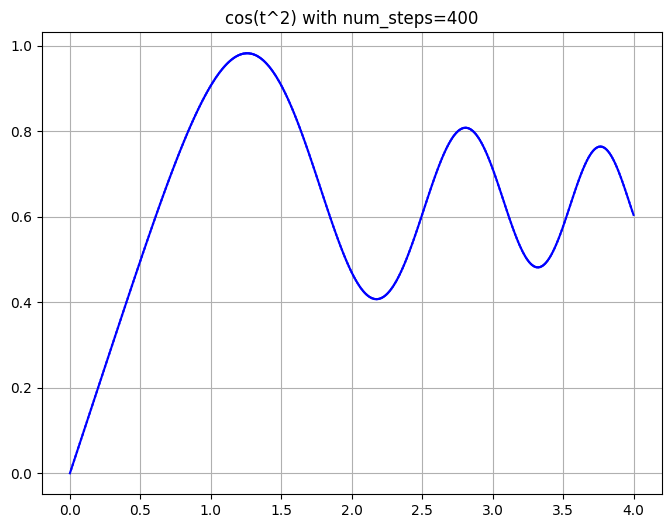

In [6]:
# generate plot with higher granularity
PLOT(0, 4, lambda t: np.cos(t**2), func_name=r'cos(t^2)', num_steps=400)

There we go! Now this looks like a recognizable cosine function. Next, let's plot all of the functions from the ebola data in a single figure.

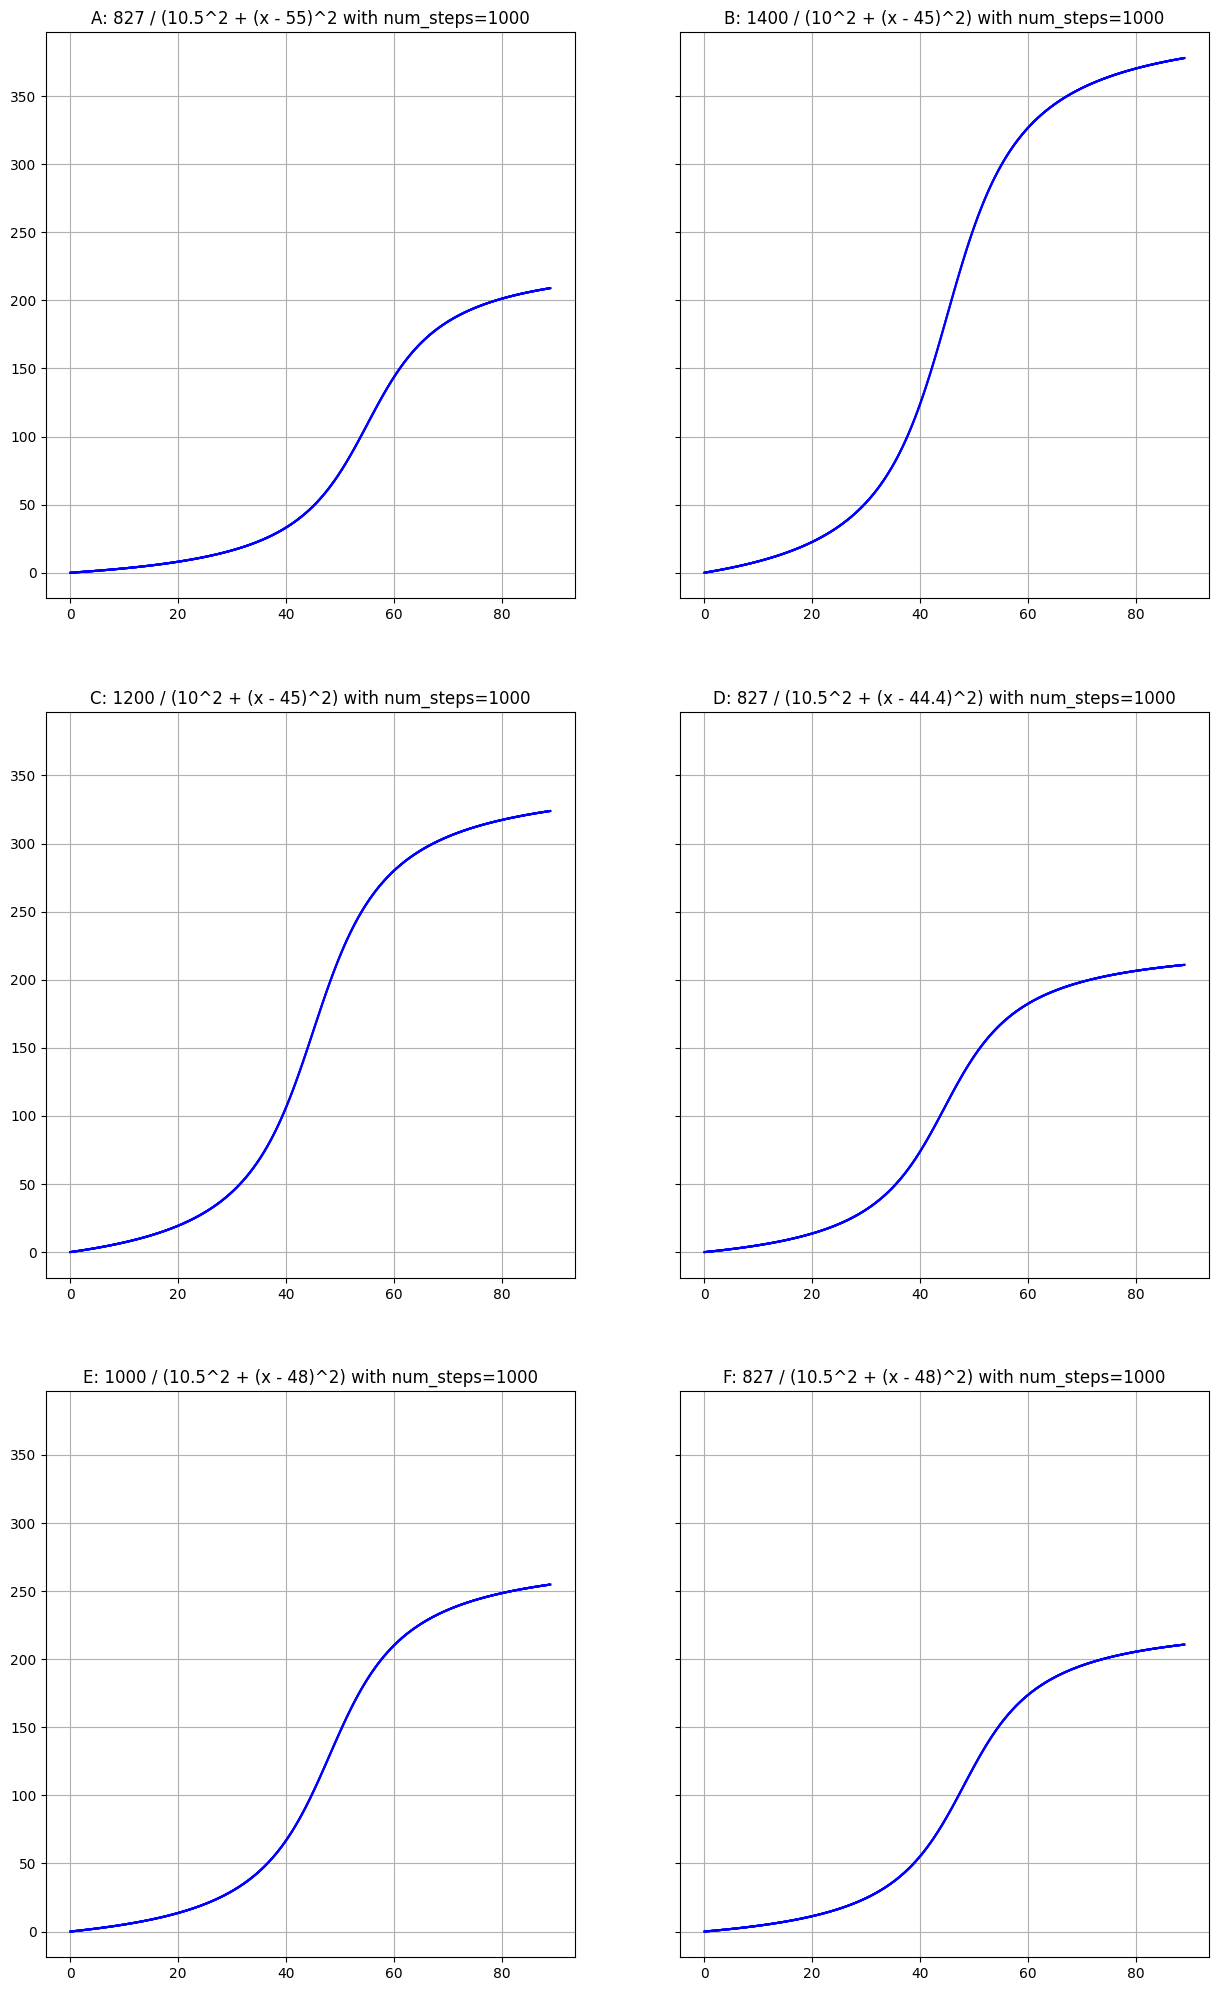

In [7]:
# create list of functions to plot
funcs = [
    (lambda x: 827 / ((10.5)**2 + (x - 55)**2), r'A: 827 / (10.5^2 + (x - 55)^2'),
    (lambda x: 1400 / ((10)**2 + (x - 45)**2), r'B: 1400 / (10^2 + (x - 45)^2)'),
    (lambda x: 1200 / ((10)**2 + (x - 45)**2), r'C: 1200 / (10^2 + (x - 45)^2)'),
    (lambda x: 827 / ((10.5)**2 + (x - 44.4)**2), r'D: 827 / (10.5^2 + (x - 44.4)^2)'),
    (lambda x: 1000 / ((10.5)**2 + (x - 48)**2), r'E: 1000 / (10.5^2 + (x - 48)^2)'),
    (lambda x: 827 / ((10.5)**2 + (x - 48)**2), r'F: 827 / (10.5^2 + (x - 48)^2)')
]

# create the plot and subplots with the same y axis for easy comparison
fig, axes = plt.subplots(3, 2, figsize=(15, 25), sharey=True)
axes = axes.flatten()

# plot each function from the ebola data
for i, func in enumerate(funcs):
    ax = axes[i]
    PLOT(0, 89, func[0], func_name=func[1], num_steps=1000, ax=ax)